<a href="https://colab.research.google.com/github/raisilhamn/INASTEK-digits/blob/main/INASTEK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rais Ilham Nustara
# SIstem Informasim Universitas Airlangga

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_digits

In [ ]:
digits = datasets.load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# Print jumlah Data
print("Bentuk data" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Jumlah label", digits.target_names.shape)

Bentuk data (1797, 64)
Jumlah label (10,)


In [ ]:
unique_label, counts = np.unique(digits.target, return_counts=True)
label_count = dict(zip(unique_label, counts))

# Jumlah data per label
print("Jumlah data per label :")
for label, count in label_count.items():
    print(label, ":", count)

Jumlah data per label :
0 : 178
1 : 182
2 : 177
3 : 183
4 : 181
5 : 182
6 : 181
7 : 179
8 : 174
9 : 180


In [ ]:
 #Melihat contoh dari satu data (digit 5)
# Terlihat bahwa data gambar adalah vertor berdimensi tinggi, data ini dapat divisualisasikan ke plot agar lebih mudah dipahami
digits.images[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

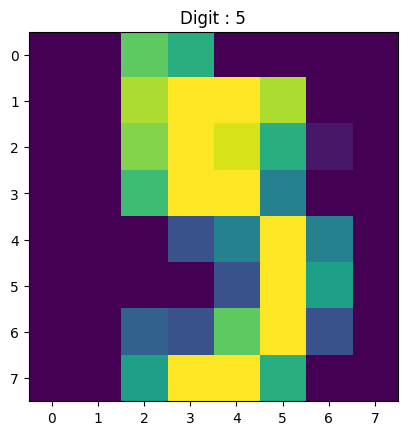

In [ ]:
def show_digit(index):
    plt.imshow(digits.images[index], interpolation='nearest')
    plt.title('Digit : '+ str(digits.target[index]))
    plt.show()

show_digit(5)

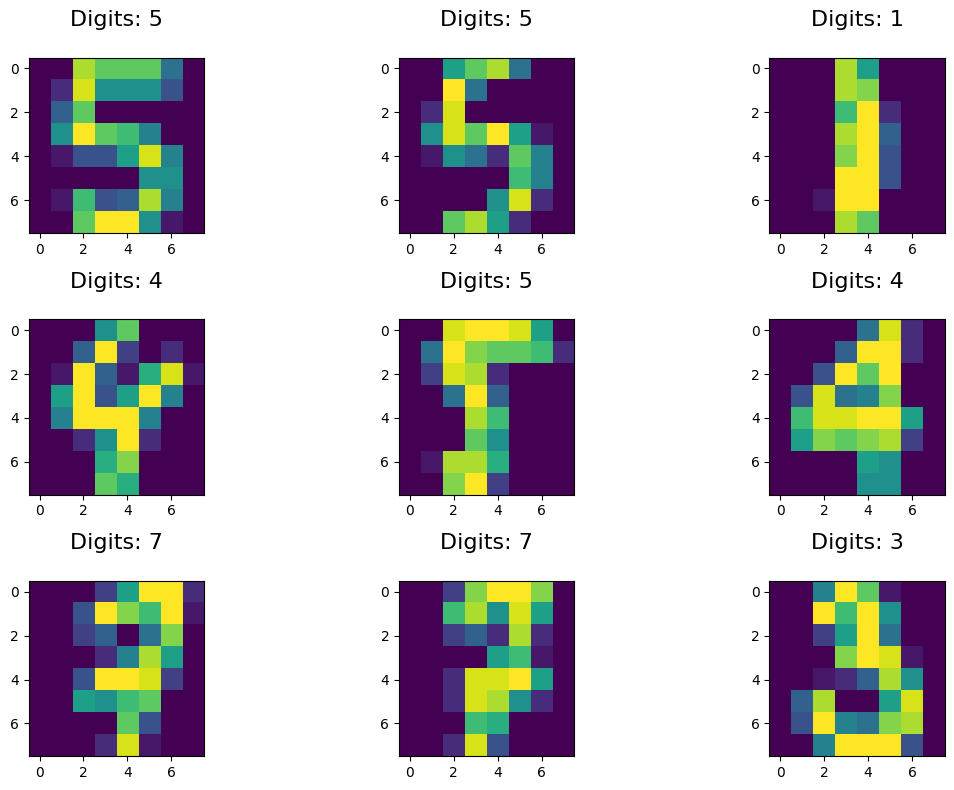

In [ ]:
random_indices = np.random.choice(len(digits.data), size=9, replace=False)

plt.figure(figsize=(12, 8))
for index, image_index in enumerate(random_indices):
    image = digits.data[image_index]
    label = digits.target[image_index]
    plt.subplot(3, 3, index + 1)
    plt.imshow(np.reshape(image, (8, 8)))
    plt.title('Digits: %i\n' % label, fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
# Split data 80:20
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=3)
print("Size of train set:", len(x_train))
print("Size of test set:", len(x_test))

Size of train set: 1437
Size of test set: 360


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(random_state=1, n_estimators=1000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)



Akurasi: 0.9722222222222222


Confusion Matrix:
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  2  0  0]
 [ 0  0  0  0  1 35  0  0  0  2]
 [ 0  0  0  0  0  0 24  0  1  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  2 27  0]
 [ 0  0  0  1  0  0  0  1  0 27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        31
           3       0.98      1.00      0.99        40
           4       0.98      0.95      0.97        44
           5       1.00      0.92      0.96        38
           6       1.00      0.96      0.98        25
           7       0.89      1.00      0.94        42
           8       0.96      0.93      0.95        29
           9       0.93      0.93      0.93        29

    accuracy                   

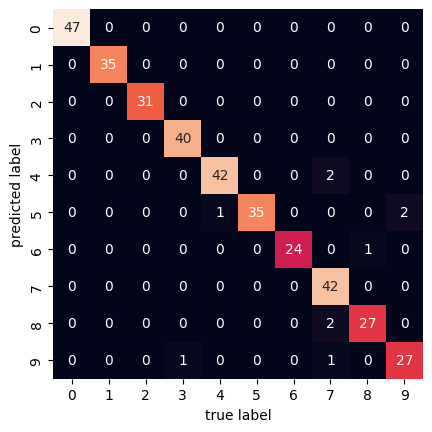

In [ ]:

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
from sklearn.metrics import confusion_matrix

sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


from sklearn.metrics import classification_report
print()

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print()
cv_scores = cross_val_score(model, x_train, y_train, cv=5)
print(f"Skor Cross-Validation: {cv_scores}")
print(f"Rata rata cross-validation: {np.mean(cv_scores) * 100:.2f}%")

# Mengganti komposisi data latih dan uji menjadi 70:30

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=3)
print("Size of train set:", len(x_train))
print("Size of test set:", len(x_test))


Size of train set: 1257
Size of test set: 540


In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=1000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9740740740740741


Confusion Matrix:
[[64  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  1  0]
 [ 0  0  0  0 59  0  0  1  1  0]
 [ 0  0  0  0  1 47  0  0  0  1]
 [ 0  0  0  0  0  1 40  0  1  0]
 [ 0  0  0  0  0  0  0 56  1  0]
 [ 0  2  0  0  0  0  0  0 49  1]
 [ 0  0  0  1  0  0  0  1  1 44]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        56
           3       0.98      0.98      0.98        56
           4       0.98      0.97      0.98        61
           5       0.98      0.96      0.97        49
           6       1.00      0.95      0.98        42
           7       0.97      0.98      0.97        57
           8       0.91      0.94      0.92        52
           9       0.96      0.94      0.95        47

    accuracy                   

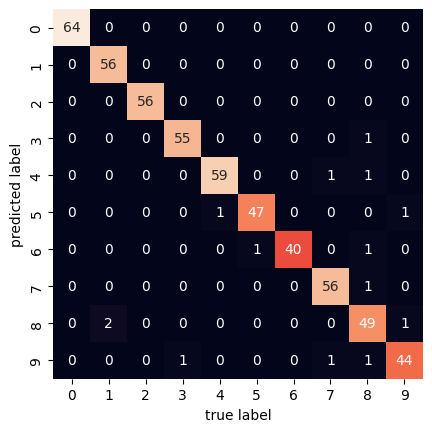

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm2)

sns.heatmap(cm2, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

from sklearn.metrics import classification_report
print()

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cv_scores = cross_val_score(model, x_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average accuracy obtained from cross-validation: {np.mean(cv_scores) * 100:.2f}%")


# Menguji model dengan data random


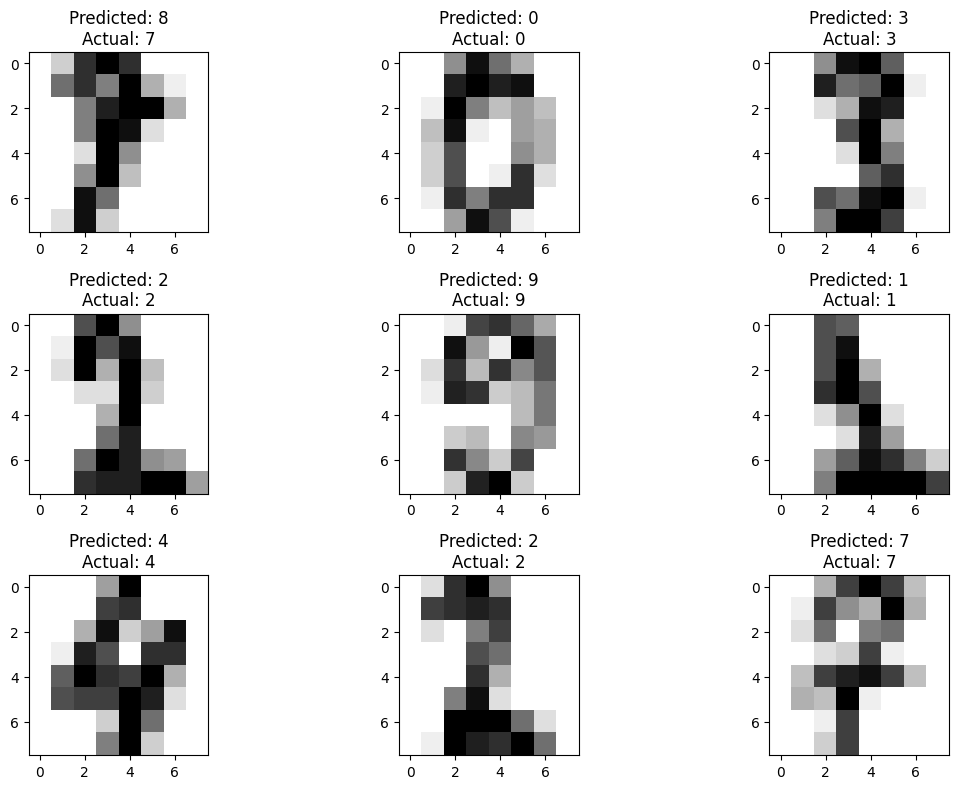

In [ ]:
random_indices = np.random.choice(len(x_test), size=9, replace=False)

plt.figure(figsize=(12, 8))
for index, image_index in enumerate(random_indices):
    image = x_test[image_index]
    predicted_label = y_pred[image_index]
    actual_label = y_test[image_index]

    plt.subplot(3, 3, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=12)

plt.tight_layout()
plt.show()

# Metode Lain (SVM dengan Kernel RBF)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

digits = datasets.load_digits()

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=3)

# Definisikan parameter untuk grid search
param_grid = {'C': [1, 10, 100], 'gamma': [0.001, 0.01, 0.1]}

# Buat SVM classifier
svm = SVC(random_state=1, kernel='rbf')

# caru grid search
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the SVM model with the best hyperparameters
svm = SVC(**best_params)
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = svm.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9888888888888889


In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

from sklearn.metrics import classification_report
print()
# Assuming you have the true labels in y_test and predicted labels in y_pred
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print()
cv_scores = cross_val_score(model, x_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average accuracy obtained from cross-validation: {np.mean(cv_scores) * 100:.2f}%")


Confusion Matrix:
[[64  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  2]
 [ 0  0  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 57  0  0]
 [ 0  1  0  0  0  0  0  0 50  1]
 [ 0  0  0  0  0  0  0  1  0 46]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        61
           5       1.00      0.96      0.98        49
           6       1.00      0.98      0.99        42
           7       0.98      1.00      0.99        57
           8       0.98      0.96      0.97        52
           9       0.94      0.98      0.96        47

    accuracy                   

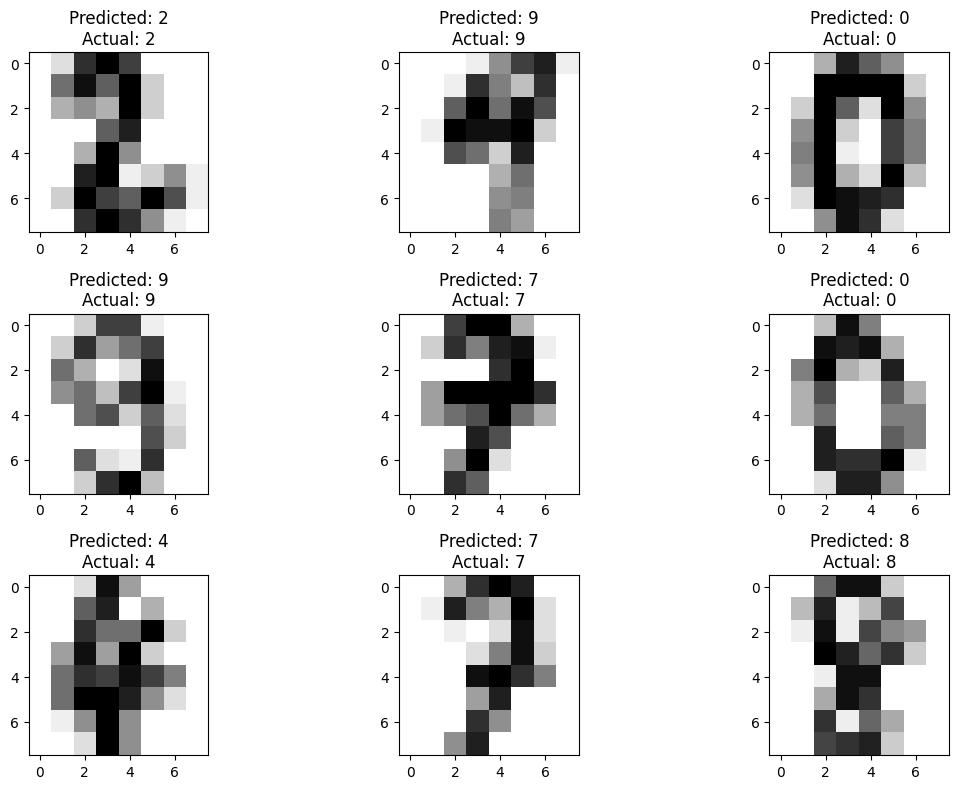

In [ ]:

# Display random digit images with predicted and actual labels
random_indices = np.random.choice(len(x_test), size=9, replace=False)

plt.figure(figsize=(12, 8))
for index, image_index in enumerate(random_indices):
    image = x_test[image_index]
    predicted_label = y_pred[image_index]
    actual_label = y_test[image_index]

    plt.subplot(3, 3, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=12)

plt.tight_layout()
plt.show()

# Menggunakan CNN

Epoch 1/50
40/40 [==============================] - 13s 17ms/step - loss: 1.9029 - accuracy: 0.4336 - val_loss: 0.9514 - val_accuracy: 0.8630
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.5540 - accuracy: 0.8488 - val_loss: 0.2941 - val_accuracy: 0.9148
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 0.2348 - accuracy: 0.9276 - val_loss: 0.1458 - val_accuracy: 0.9648
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 0.1599 - accuracy: 0.9515 - val_loss: 0.1400 - val_accuracy: 0.9667
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 0.1500 - accuracy: 0.9578 - val_loss: 0.0884 - val_accuracy: 0.9796
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0807 - accuracy: 0.9825 - val_loss: 0.0799 - val_accuracy: 0.9796
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0845 - accuracy: 0.9730 - val_loss: 0.0746 - val_accuracy: 0.9796
Epoch 8/50
40/40 [

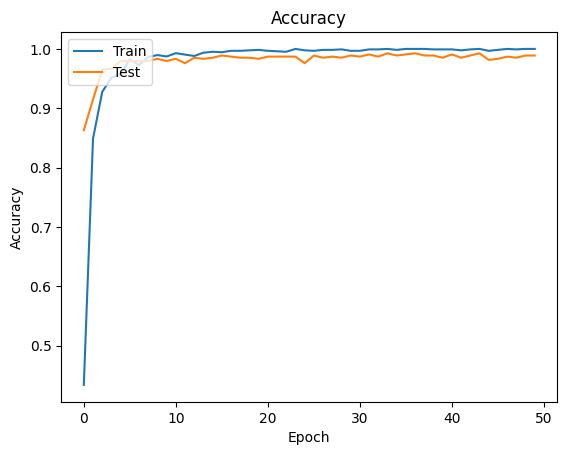

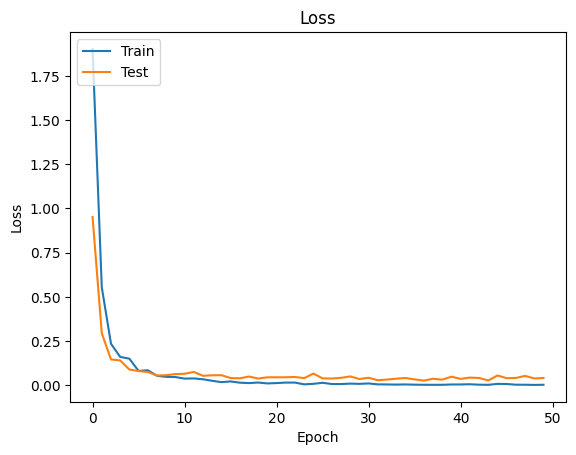

In [ ]:
# Normalisasi data
data = digits.images / 16


# Enchoding labelnya
labels = np_utils.to_categorical(digits.target)

# Ubah data agar bisa masuk ke CNN
data = data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=3)


model = tf.keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(8, 8, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


17/17 [==============================] - 0s 2ms/step
Confusion Matrix:
[[64  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  1]
 [ 1  1  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 56  1  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0  0  1 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        61
           5       1.00      0.98      0.99        49
           6       1.00      0.95      0.98        42
           7       1.00      0.98      0.99        57
           8       0.96      0.98      0.97        52
           9       0.98      0.98 

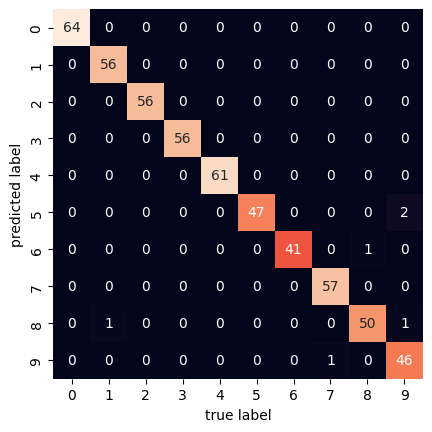

In [ ]:


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


cm2 = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm2)

sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Calculate classification report
report = classification_report(y_test_labels, y_pred)
print("Classification Report:")
print(report)

# Calculate accuracy for model evaluation
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test_labels, y_pred)
print("Akurasi", accuracy.result().numpy())